# Machine Learning Project

# Assignment: Perform the following analyses on gum_disease_data.txt 
## The features will be the bacterial species abundances and the classifier will be status. 

## (1) Run a Decision Tree classifier.
## (2) Run a Support Vector Machine analysis.
## The next item is not graded ->
## (3) NOT GRADED (for fun): Tensor flow neural network.

Helpful sites for Decision Tree code:
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
Plotting the decision trees:
https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn

(Some Random Forest code in case you are interested: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

For Support Vector Machine help see the HA3-checkpoint jupyter notebook or python script.

For Tensor Flow support (using Iris dataset):
https://www.kaggle.com/richbrosius/iris-classification-using-tensorflow


## Data manipulation and plotting libraries

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [181]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, recall_score, precision_score




## Decision Tree libraries





In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn import tree





## SVM Libraries





In [183]:
from sklearn import svm

from sklearn.svm import LinearSVC




## Read in data set




In [184]:
##DO NOT CHANGE THIS LINE OF CODE
df=pd.read_csv('/Users/surangijayasinghe/gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df.head()


#read in file 

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## Training set for all analyses

In [185]:
## FIX THIS EXAMPLE 
#X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4], df['target'],
#                                                   test_size = 0.33, random_state = 100)

###   This line splits the dataset into two sets: training and testing data for both features (X_train, X_test) and labels (y_train, y_test). Here's a breakdown of the parameters used:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:5], df['status'],
                                                    test_size=0.33, random_state=100)


In [188]:
X_train.head 
#see values of train 

<bound method NDFrame.head of     strep  prev  lepto  fuso
6    12.3  11.5    9.1   5.5
46   22.0   6.6    3.2   7.1
37    5.0  11.5    5.8  17.8
59    7.9   5.3   21.0  13.4
50   29.0   3.1   26.6   9.3
17   14.2   8.3    6.0   8.1
38    3.9  14.2   13.8  18.5
60   24.0  29.9   18.9   3.2
42   61.7   1.7    0.4   2.6
45    2.9   6.6    4.3  17.1
30   11.4  15.7   18.6   6.6
66   19.9   0.0    2.5   0.0
56   19.1  10.4    9.6   7.0
40   18.6   2.4   10.3   8.8
64   39.8   0.7    7.6   0.3
47    2.7  20.2    8.3  12.5
7     3.3  24.7    6.3  10.4
3    15.2   4.2    0.2   2.6
51    6.4  19.6    5.9  11.8
62   36.5   1.9   10.8   4.9
58    2.1  11.0   11.9  11.8
19    8.1   3.1   11.2  25.0
13   26.6   3.4   13.9   9.0
1    26.0   0.0   25.6   0.0
31    5.3  14.1   15.0  17.1
4    33.2   2.3    7.4   1.3
44    1.6   6.9    9.9  10.1
27   18.8   7.6   18.7   9.1
2    19.0  24.2    4.8   5.7
22   13.6  27.4    9.6   9.3
29   15.2   0.5    2.0   5.7
9    22.0   8.9   17.8   4.8
16   18.1   9

In [189]:
print(df.columns)

Index(['id', 'strep', 'prev', 'lepto', 'fuso', 'veil', 'time', 'status',
       'pocket', 'deepest'],
      dtype='object')


## Part 1

## Decision Tree Analysis

In [190]:
  #types
print(df.dtypes)


id          object
strep      float64
prev       float64
lepto      float64
fuso       float64
veil       float64
time         int64
status       int64
pocket     float64
deepest    float64
dtype: object


In [191]:
print( "Dataset Length:: ", len(df))
print( "Dataset Shape:: ", df)

Dataset Length::  72
Dataset Shape::        id  strep  prev  lepto  fuso  veil  time  status  pocket  deepest
0   S001   57.4  10.2    0.1   0.0   6.9     1       0     2.7      3.8
1   S001   26.0   0.0   25.6   0.0   6.3     2       0     2.7      3.0
2   S006   19.0  24.2    4.8   5.7   4.2     1       0     2.5      3.2
3   S006   15.2   4.2    0.2   2.6   3.4     2       0     2.4      3.2
4   S007   33.2   2.3    7.4   1.3  12.0     1       0     2.4      2.7
..   ...    ...   ...    ...   ...   ...   ...     ...     ...      ...
67  S063   24.8   2.5    9.1   7.0   3.2     2       0     2.7      3.7
68  S065    7.1  12.3    2.5  11.0   5.1     1       1     2.4      3.7
69  S065    1.8  10.2    9.0  15.7   6.3     2       1     2.7      3.3
70  S068   15.9  23.0    9.8   6.7   7.3     1       0     2.2      3.7
71  S068   16.8  11.6   27.1   7.9   2.2     2       0     2.8      4.2

[72 rows x 10 columns]


## Generate Decision Tree

In [192]:
# Drop the 'id' column from the DataFrame
#df = df.drop(columns=['id'])

# Separate features and target variable
#X = df.drop(columns=['status'])  # Features
#y = df['status']  # Target variable

#X = df.values[:, 1:5]
#y = df.values[:, :7]

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Fit the DecisionTreeClassifier
#clf = DecisionTreeClassifier()
#clf.fit(X_train, y_train)

# Predict the target variable for the test data
#y#_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)
#

In [361]:

# creating a decision tree classifier using the Gini impurity criterion.
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

## Show gini prediction

In [360]:
# Make predictions on the test data
#To make predictions using the trained decision tree classifier
#(clf_gini), you can use the predict method on the test data (X_test)
y_pred = clf_gini.predict(X_test)

# Show the predictions
print("Predicted labels:")
print(y_pred)


Predicted labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [194]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)


### in training module, use entropy as a criteria 
#Entropy (criterion="entropy") is another measure of impurity or disorder. 
#Like Gini impurity, it also tries to minimize the probability of misclassification by choosing the split that maximizes the purity of the classes in the child nodes. Entropy is based on information theory and measures the average amount of information needed to classify a sample.


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [195]:
clf_gini.predict([[ 57.4,  10.2,  0.1, 0.0]]) #predict classes for our test set 

/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [196]:
#Prediction for Decision Tree classifier with criterion as gini index
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1])

In [197]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1])

## Print accuracy

In [198]:
print( "Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  100.0


In [199]:
print( "Accuracy is ", accuracy_score(y_test,y_pred_en)*100)


Accuracy is  100.0


## Create dot file of Decision Tree



In [200]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
clf = tree.DecisionTreeClassifier()




In [201]:

df=pd.read_csv('/Users/surangijayasinghe/gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)


tree.export_graphviz(clf_gini, out_file= 'dotfile')

In [202]:
#dot -Tpng tree.dot -o tree.png############ RAN THIS ON TERMINAL AND GOT IMAGE! YAY ### will upload image 

## Part 2

## Support Vector Machine

In [203]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

## Visualize the first 5 rows of the dataset

In [204]:
df=pd.read_csv('/Users/surangijayasinghe/gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df.head()


,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


In [205]:
df.shape # 72 instance and 10 variables in the data set 

(72, 10)

In [239]:
df.status

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    1
69    1
70    0
71    0
Name: status, Length: 72, dtype: int64

In [206]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['id', 'strep', 'prev', 'lepto', 'fuso', 'veil', 'time', 'status',
       'pocket', 'deepest'],
      dtype='object')

In [207]:
# check distribution of status_class column

df['status'].value_counts()

status
0    46
1    26
Name: count, dtype: int64

In [208]:
# view summary statistics in numerical variables

round(df.describe(),2)

,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
count,72.00,72.00,72.00,72.00,72.00,72.0,72.00,72.00,72.00
mean,15.70,11.68,10.40,8.79,5.90,1.5,0.36,2.60,3.38
std,12.24,8.77,6.82,5.31,4.90,0.5,0.48,0.42,0.69
min,1.60,0.00,0.10,0.00,0.10,1.0,0.00,1.30,1.80
25%,6.32,6.60,4.70,5.70,2.85,1.0,0.00,2.40,2.95
50%,12.25,10.40,9.60,8.20,4.60,1.5,0.00,2.60,3.30
75%,22.00,16.00,14.40,11.52,7.50,2.0,1.00,2.80,3.80
max,61.70,39.90,29.10,25.00,26.20,2.0,1.00,3.80,5.20


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       72 non-null     object 
 1   strep    72 non-null     float64
 2   prev     72 non-null     float64
 3   lepto    72 non-null     float64
 4   fuso     72 non-null     float64
 5   veil     72 non-null     float64
 6   time     72 non-null     int64  
 7   status   72 non-null     int64  
 8   pocket   72 non-null     float64
 9   deepest  72 non-null     float64
dtypes: float64(7), int64(2), object(1)
memory usage: 5.8+ KB


In [242]:
#Binarize the target features

status = []
for i in df.status:
    if i == 2:
        i = 1
        status.append(i)
    else:
        status.append(i)
status
    

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0]

In [245]:
status = np.asarray(status) #double check status
status

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0])

In [246]:
df['status'] = status
df.head()

,strep,prev,lepto,fuso,veil,status
0,57.4,10.2,0.1,0.0,6.9,0
1,26.0,0.0,25.6,0.0,6.3,0
2,19.0,24.2,4.8,5.7,4.2,0
3,15.2,4.2,0.2,2.6,3.4,0
4,33.2,2.3,7.4,1.3,12.0,0


## View pairwise plots of all bacteria features (strep, prev, lepto, fuso, veil) to find best combination of dimensions (clearest separation between class 0 and 1)

/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


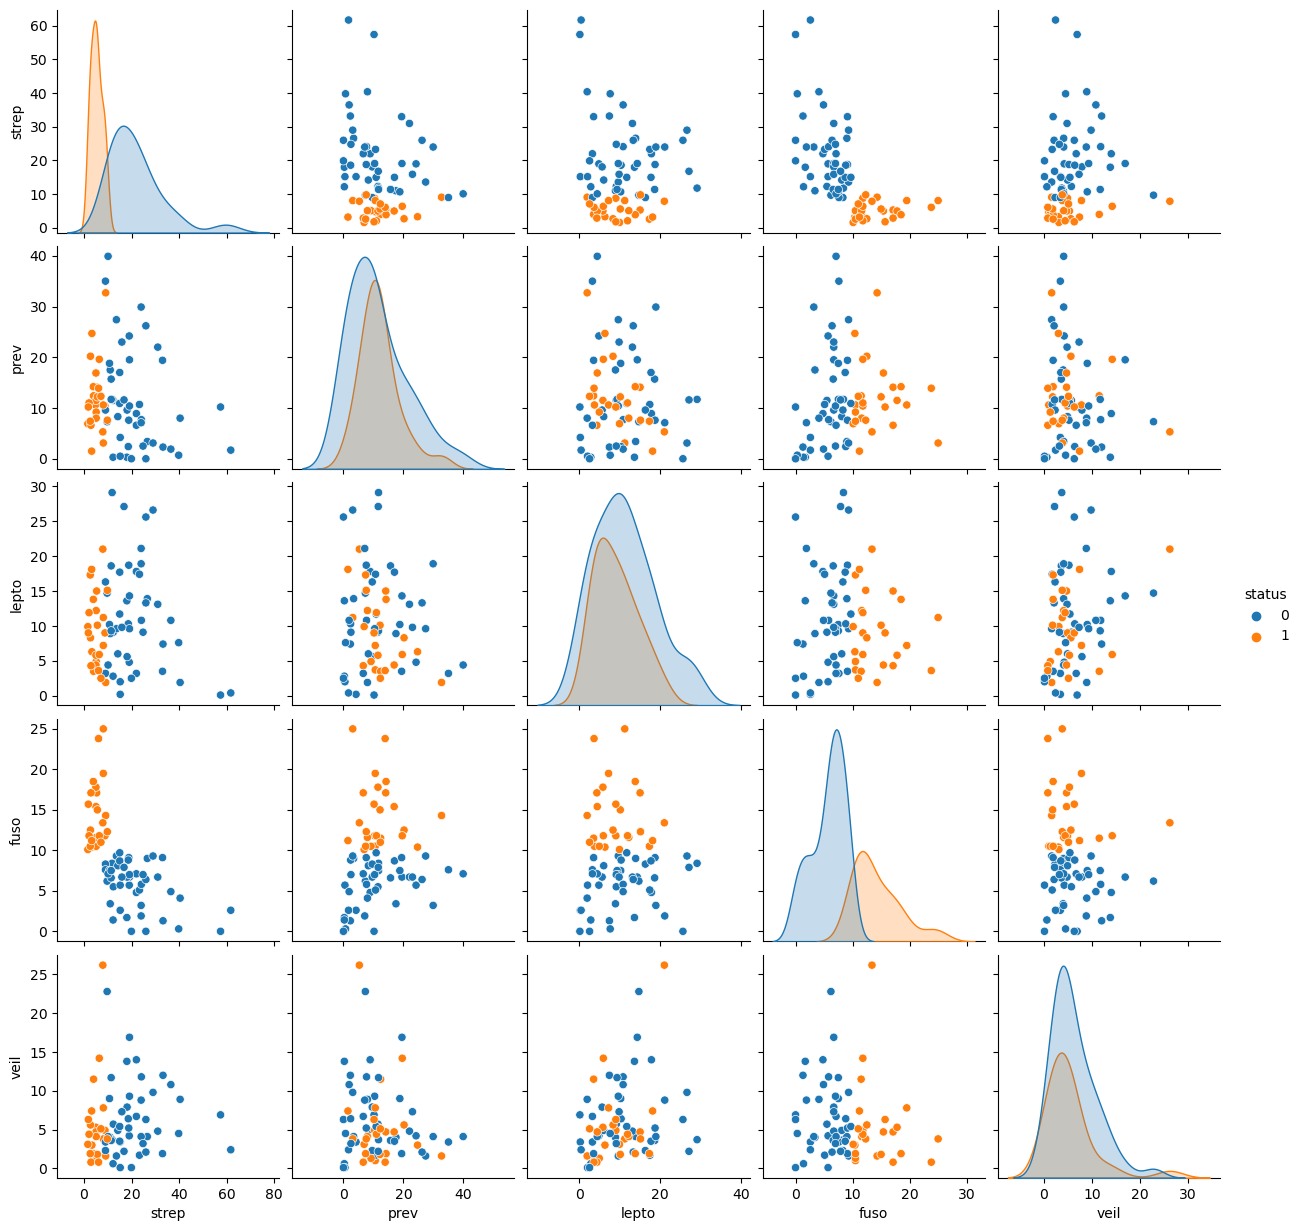

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'df' containing the bacterial features and the classes
# plot all bacteria features with class o and 1

import seaborn as sns
sns.pairplot(df, vars = ['strep', 'prev', 'lepto', 'fuso', 'veil'], hue = 'status')



In [ ]:
from sklearn.model_selection import train_test_split
#The train_test_split function from the sklearn.model_selection module is commonly used to split datasets into random train and test subsets

In [249]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:5], df['status'],
                                                   test_size = 0.33, random_state = 56)

In [250]:
X_train

,strep,prev,lepto,fuso,veil
36,4.0,12.4,3.5,11.5,11.5
45,2.9,6.6,4.3,17.1,0.8
63,3.2,1.5,18.1,11.2,7.4
49,5.1,8.0,12.2,11.6,4.1
60,24.0,29.9,18.9,3.2,4.1
17,14.2,8.3,6.0,8.1,4.9
0,57.4,10.2,0.1,0.0,6.9
48,15.0,10.9,11.7,9.7,5.4
68,7.1,12.3,2.5,11.0,5.1
30,11.4,15.7,18.6,6.6,3.6


## Make the training and testing arrays

In [252]:
testing_array = [] #store the feature values for each test sample.
# 'strep', 'prev', 'lepto', 'fuso', 'veil' are features 
test_strep_array = np.asarray(X_test['strep'])
test_prev_array = np.asarray(X_test['prev'])
test_lepto_array = np.asarray(X_test['lepto'])
test_fuso_array = np.asarray(X_test['fuso'])
test_veil_array = np.asarray(X_test['veil'])

# Iterate through the length of any of the feature arrays 
for i in range(len(test_strep_array)):
    pair = [test_strep_array[i], test_prev_array[i], test_lepto_array[i], test_fuso_array[i], test_veil_array[i]]
    testing_array.append(pair)

# Convert the list of pairs to a NumPy array
testing_array = np.array(testing_array)


In [253]:
training_array = []
# Assuming 'strep', 'prev', 'lepto', 'fuso', 'veil' are features in your dataset
train_strep_array = np.asarray(X_train['strep'])
train_prev_array = np.asarray(X_train['prev'])
train_lepto_array = np.asarray(X_train['lepto'])
train_fuso_array = np.asarray(X_train['fuso'])
train_veil_array = np.asarray(X_train['veil'])

# Iterate through the length of any of the feature arrays (assuming they are of the same length)
for i in range(len(train_strep_array)):
    pair = [train_strep_array[i], train_prev_array[i], train_lepto_array[i], train_fuso_array[i], train_veil_array[i]]
    training_array.append(pair)

# Convert the list of pairs to a NumPy array
training_array = np.array(training_array)


In [254]:
X_test.head()

,strep,prev,lepto,fuso,veil
56,19.1,10.4,9.6,7.0,9.3
23,9.0,9.6,16.3,8.3,2.3
7,3.3,24.7,6.3,10.4,3.0
9,22.0,8.9,17.8,4.8,14.0
27,18.8,7.6,18.7,9.1,5.2


In [ ]:
# Non-linear SVM Classifier

In [256]:
from sklearn import svm

In [257]:
y_train = np.array(y_train)
clf = svm.SVC(gamma= 'auto')
clf.fit(training_array, y_train)

SVC(gamma='auto')

In [258]:
prediction = clf.predict(testing_array)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [260]:
from sklearn.metrics import confusion_matrix
confuse = pd.DataFrame(confusion_matrix(y_test, prediction),
                       columns= ['Predicted strep', 'Predicted Other'],
                       index = ['True strep', 'Predicted Other'])
confuse

,Predicted strep,Predicted Other
True strep,17,0
Predicted Other,6,1


ValueError: Filler values must be provided when X has more than 2 training features.

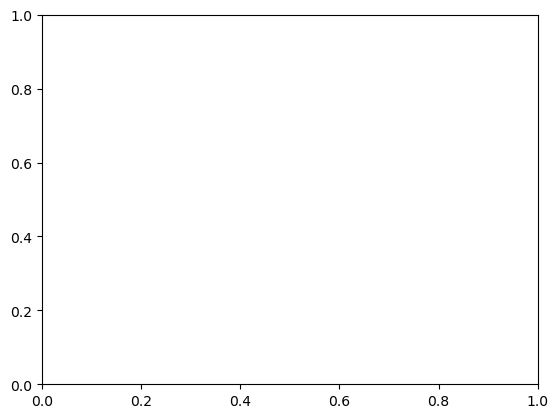

In [270]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X= testing_array, 
                      y=np.array(y_test),
                      clf=clf, 
                      legend=2)
plt.title('SVM Decision Boundary Region')

###reached out to Laura... put in example provided , installed mlxtend

In [ ]:
Linear SVM Classifier¶

In [271]:
from sklearn.svm import LinearSVC

In [272]:
clf = LinearSVC(random_state= 0, tol = 1e-5)
clf.fit(training_array, y_train)

/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [273]:
prediction_2 = clf.predict(testing_array)
prediction_2

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0])

In [274]:
pd.DataFrame(confusion_matrix(prediction_2, y_test),
             columns = ['strep', 'Other'],
             index = ['strep', 'Other'])

,strep,Other
strep,17,0
Other,0,7


In [275]:
precision_score(prediction_2, y_test)

1.0

In [276]:
recall_score(prediction_2, y_test)

1.0

In [283]:
confuse2 = pd.DataFrame(confusion_matrix(y_test, prediction_2),
                       columns= ['Predicted Strep', 'Predicted Other'],
                       index = ['True Strep', 'Predicted Other'])
confuse2

,Predicted Strep,Predicted Other
True Strep,17,0
Predicted Other,0,7


In [282]:

# Calculate the number of filler feature values needed
num_fillers = testing_array.shape[1] - 2

# Create filler feature values
filler_feature_values = [0] * num_fillers

# Print the number of filler feature values
print(filler_feature_values)


[0, 0, 0]


In [362]:
filler_feature_values = [0] * testing_array.shape[1]



## Show Decision Boundary Plot

In [289]:

# Plot the decision boundary
#plt.contourf(xx, yy, Z, alpha=0.3)
#plt.scatter(testing_array[:, 0], testing_array[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.title('SVM Decision Boundary')
#plt.show()

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X= testing_array, 
                      y=np.array(y_test),
                      clf=clf, 
                      legend=2)
plt.title('SVM Decision Boundary Region')

###again same issue 

NameError: name 'Z' is not defined

# Part A) Non-linear SVM Classifier

## Train the SVM model

In [251]:
# split X and y into training and testing sets
y_train = np.array(y_train)
clf = svm.SVC(gamma= 'auto')
clf.fit(training_array, y_train)


NameError: name 'training_array' is not defined

## SVM model predictions on the test data

In [213]:
##FOLLOWING IS A TUTORIAL I TRIED TO FOLLOW TO TEST DIFFERENT C VALUES, please see confusion matrixs ############
######BOTH MATRIXS are present for linear and non linear ###################
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((57, 5), (15, 5))

In [214]:
cols = X_train.columns

In [215]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9333


In [216]:
# instantiate classifier with rbf kernel and C=100 ############rbf kernel is used for non linear 
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9333


In [220]:
svc = SVC(kernel='rbf', C=1000.0)

# Fit classifier to training set
svc.fit(X_train, y_train)

# Make predictions on test set
y_pred = svc.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))



# instantiate classifier with rbf kernel and C=1000
#svc=SVC(C=1000.0) 


# fit classifier to training set
#svc.fit(X_train,y_train)


# make predictions on test set
#y_pred=svc.predict(X_test)


# compute and print accuracy score
#print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0: 0.9333


In [224]:

y_pred_train = svc.predict(X_train)


In [225]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [228]:
#print the scores on training and test set #check for overfitting and underfitting


# Print the scores on training and test sets to check for overfitting and underfitting
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))


##output suggets to be there may be some overfitting, model has learned training data too well

Training set score: 1.0000
Test set score: 0.9333


## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [229]:

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate classifier with RBF kernel and C=1000
svc = SVC(kernel='rbf', C=1000.0)

# Fit classifier to training set
svc.fit(X_train, y_train)

# Make predictions on test set
y_pred = svc.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Confusion Matrix:
[[10  0]
 [ 1  4]]

Metrics:
Accuracy: 0.9333
Precision: 1.0000
Recall: 0.8000
F1-Score: 0.8889


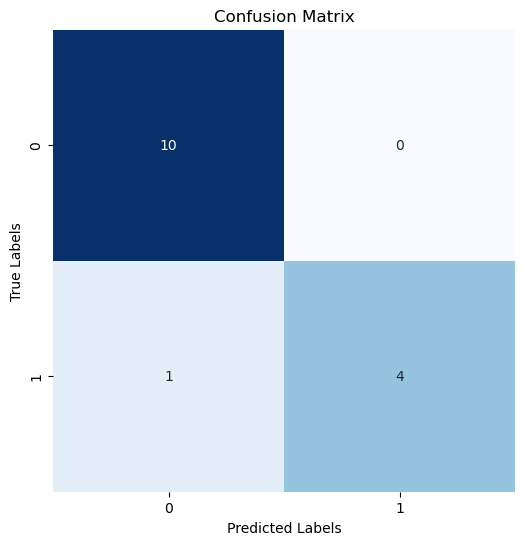

In [231]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Show Decision Boundary Plot

/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but SVC is expecting 5 features as input.

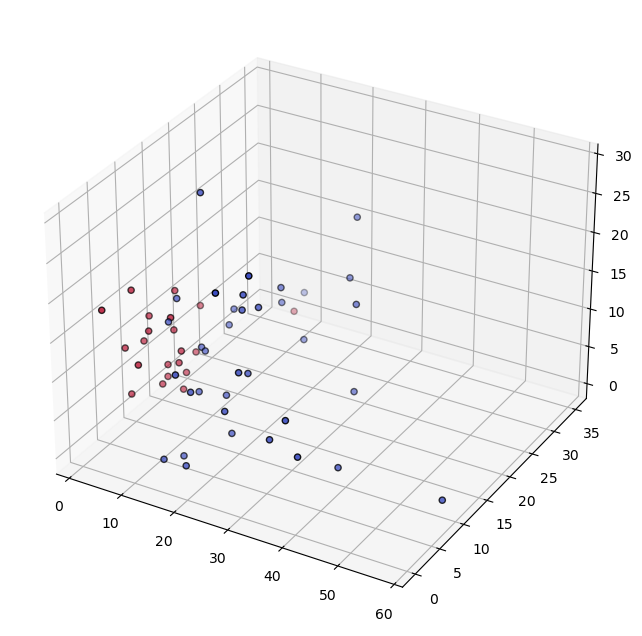

In [235]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_decision_boundary(clf, X, y):
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points
    ax.scatter(X['strep'], X['prev'], X['lepto'], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    # Create meshgrid for decision boundary
    x_min, x_max = X['strep'].min() - 1, X['strep'].max() + 1
    y_min, y_max = X['prev'].min() - 1, X['prev'].max() + 1
    z_min, z_max = X['lepto'].min() - 1, X['lepto'].max() + 1
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                              np.arange(y_min, y_max, 0.1),
                              np.arange(z_min, z_max, 0.1))

    # Predictions on grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, zz, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.set_xlabel('strep')
    ax.set_ylabel('prev')
    ax.set_zlabel('lepto')
    ax.set_title('Decision Boundary')

    plt.show()

# Call the plot_decision_boundary function
plot_decision_boundary(svc, X_train, y_train)




/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but SVC is expecting 5 features as input.

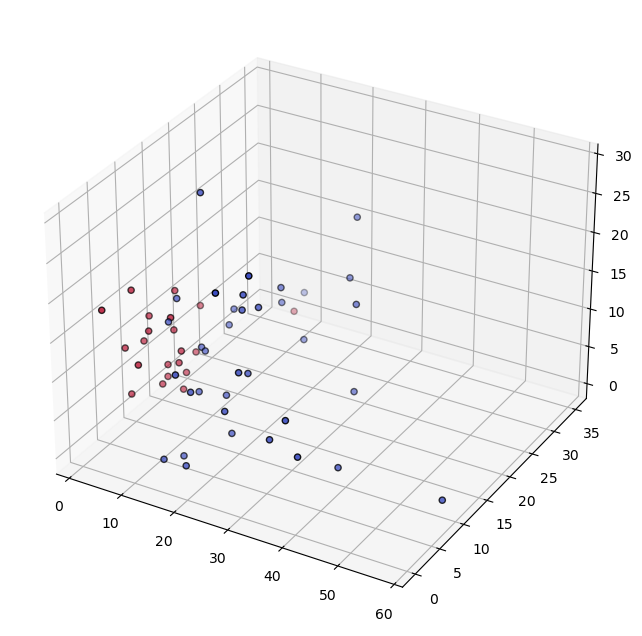

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_decision_boundary(clf, X, y):
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points
    ax.scatter(X['strep'], X['prev'], X['lepto'], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    # Create meshgrid for decision boundary
    x_min, x_max = X['strep'].min() - 1, X['strep'].max() + 1
    y_min, y_max = X['prev'].min() - 1, X['prev'].max() + 1
    z_min, z_max = X['lepto'].min() - 1, X['lepto'].max() + 1
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                              np.arange(y_min, y_max, 0.1),
                              np.arange(z_min, z_max, 0.1))

    # Predictions on grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, zz, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.set_xlabel('strep')
    ax.set_ylabel('prev')
    ax.set_zlabel('lepto')
    ax.set_title('Decision Boundary')

    plt.show()

# Call the plot_decision_boundary function
plot_decision_boundary(svc, X_train, y_train)


# Part B) Linear SVM Classifier

## Train the linear classifier

In [39]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 1.0000


In [40]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 1.0000


In [41]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 1.0000


## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [47]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10  0]
 [ 0  5]]

True Positives(TP) =  10

True Negatives(TN) =  5

False Positives(FP) =  0

False Negatives(FN) =  0


<Axes: >

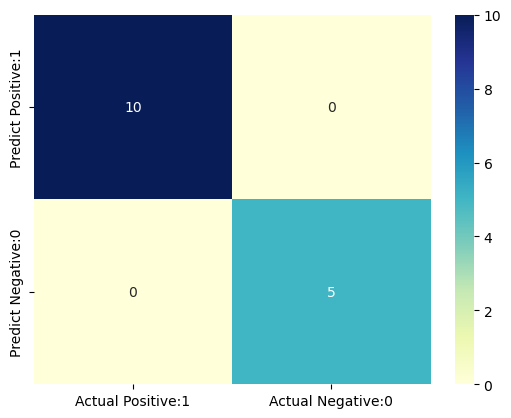

In [48]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Show Precision and Recall scores

In [51]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [52]:
#print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [53]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [54]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [55]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


# Part C) Neural Network extra credit

In [295]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from pandas import get_dummies
from sklearn.cross_validation import train_test_split
# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline
from sklearn.model_selection import train_test_split


In [296]:
#read in data 
data=pd.read_csv('/Users/surangijayasinghe/gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
data.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


In [297]:
data.shape

(72, 10)

/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


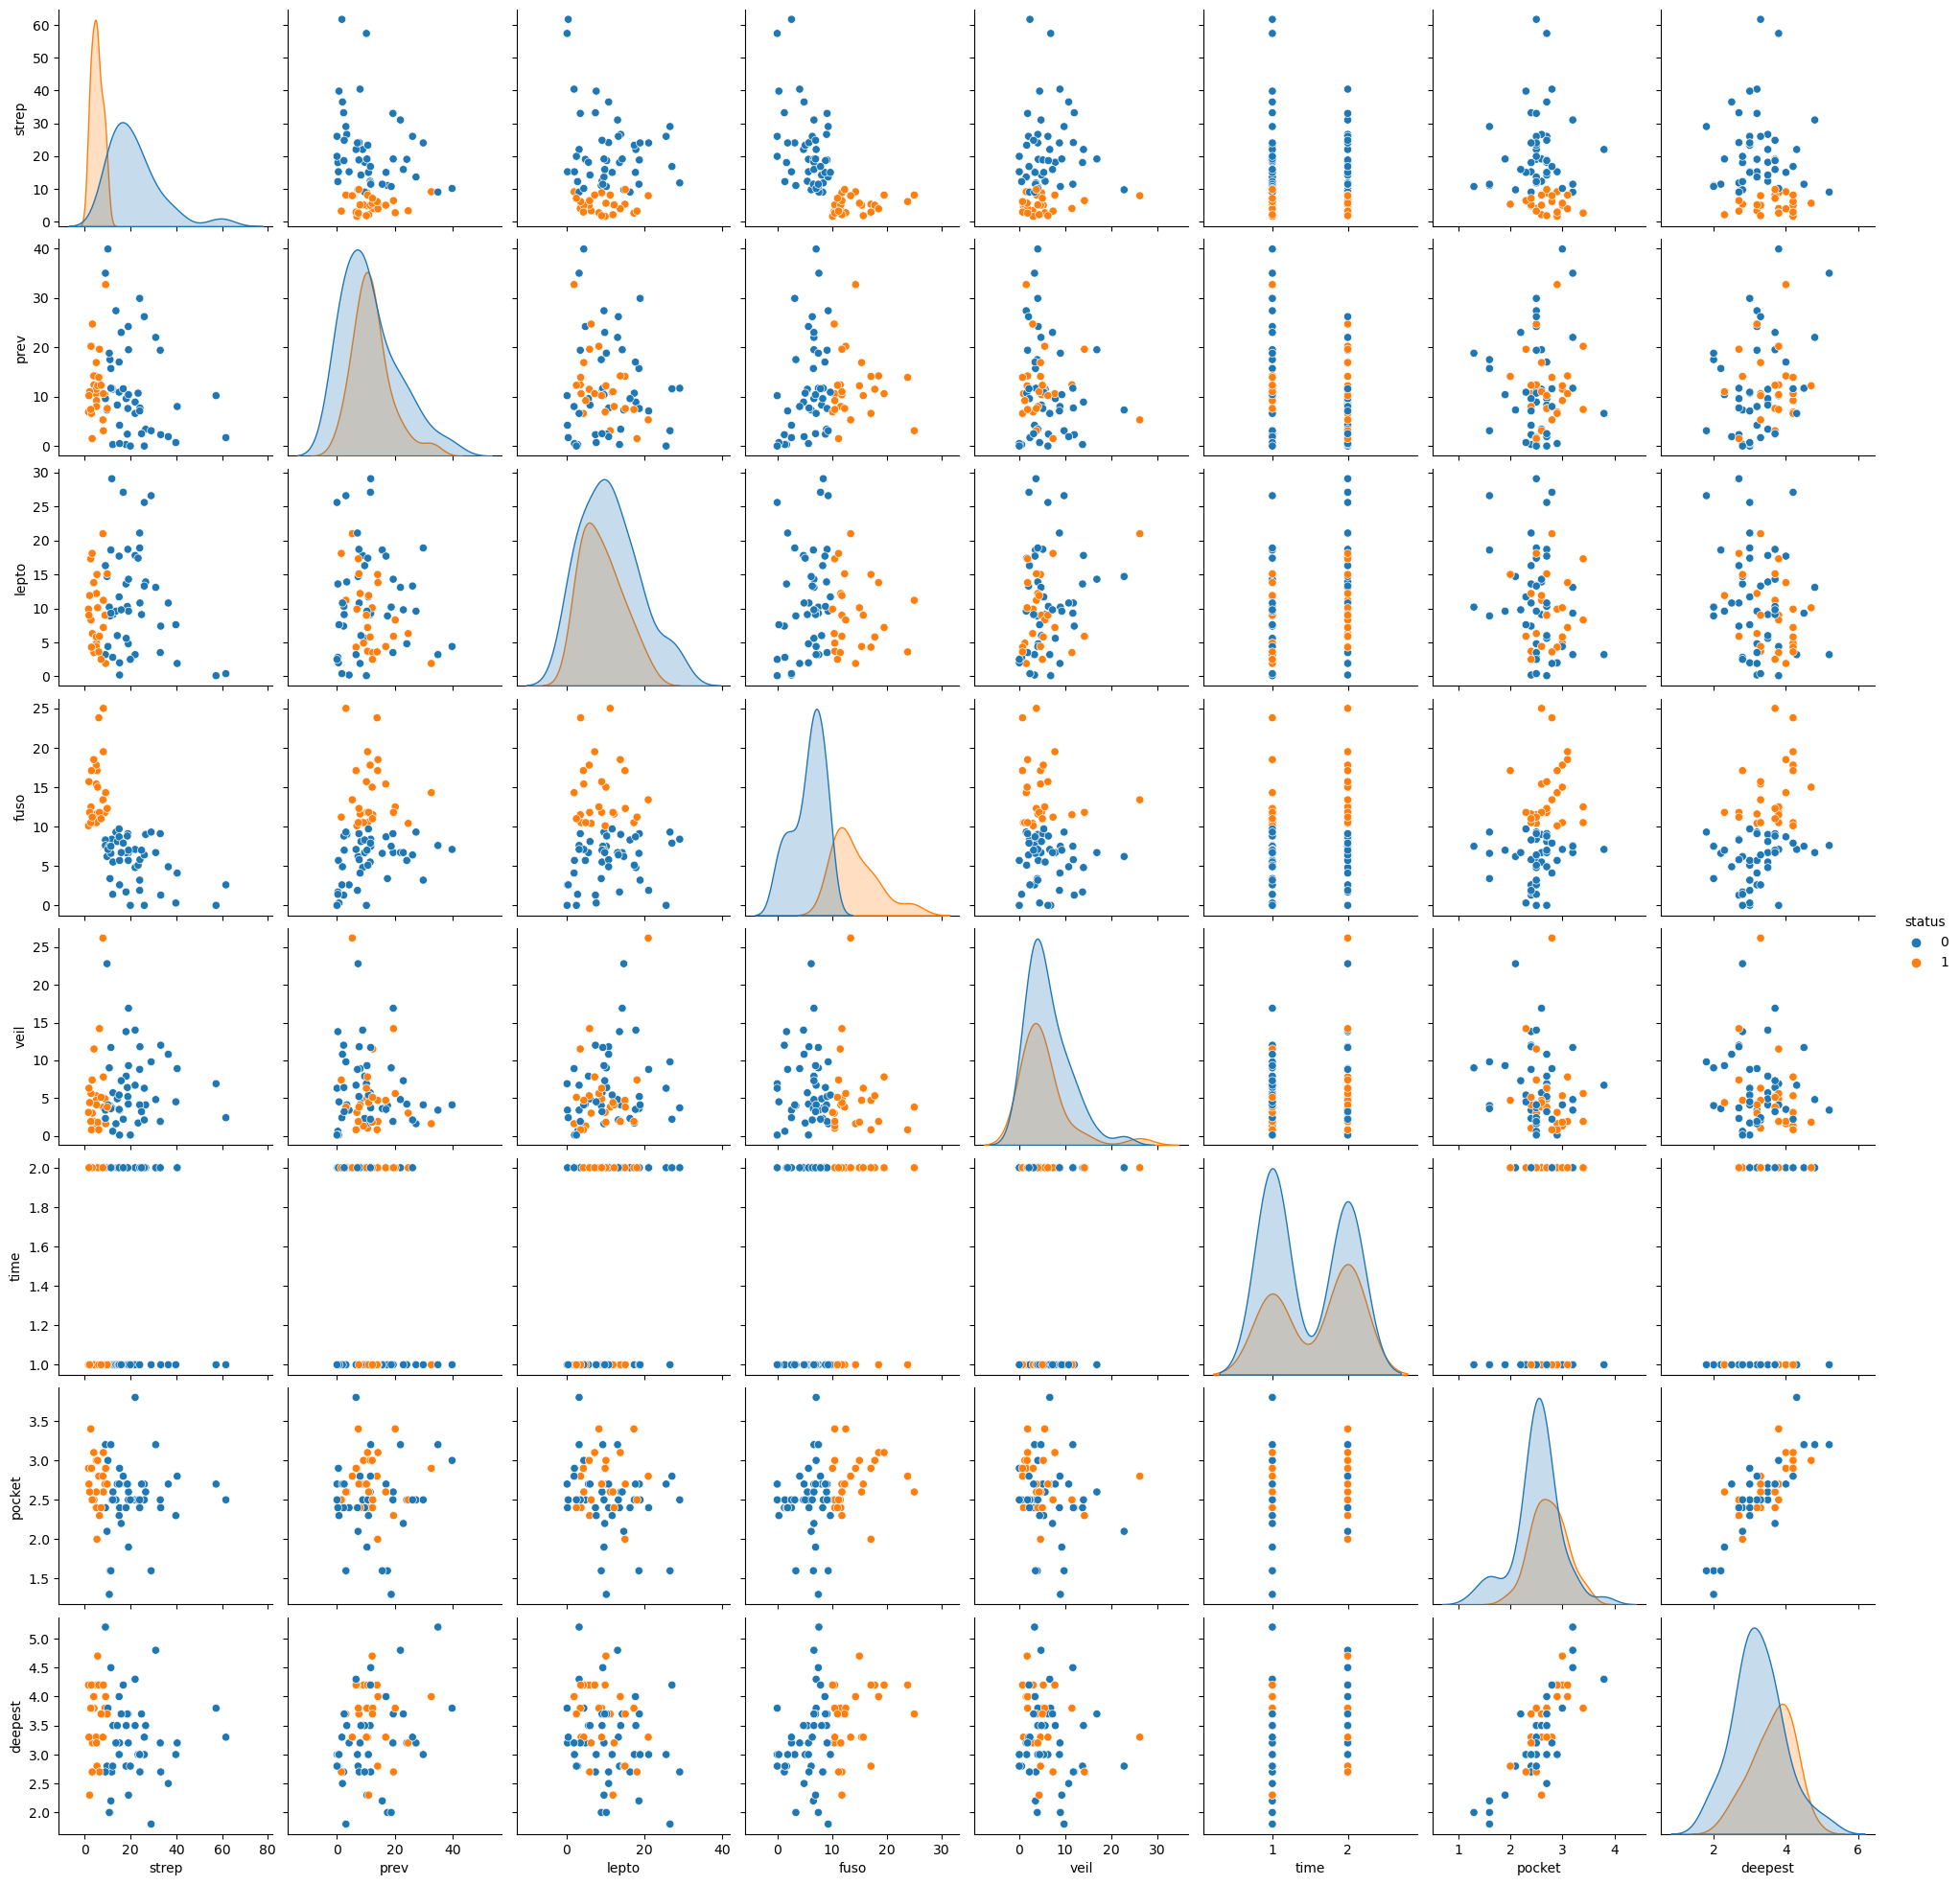

In [298]:
# Visualize data with Seaborn
g=sns.pairplot(data, hue="status", size= 2.5)

In [300]:
cols = data.columns
features = cols[1:5]
labels = cols[7]
print(features)
print(labels)

Index(['strep', 'prev', 'lepto', 'fuso'], dtype='object')
status


In [308]:
import numpy as np
import pandas as pd

# Assume data is your DataFrame
# Replace non-numeric values with NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
data = data.dropna()

# Calculate mean and standard deviation for each feature
means = data.mean()
std_devs = data.std()

# Normalize the data using Z-score normalization
data_normalized = (data - means) / std_devs

# Show the mean and standard deviation of the normalized data
print("Mean of normalized data:")
print(data_normalized.mean())
print("\nStandard deviation of normalized data:")
print(data_normalized.std())



Mean of normalized data:
id        NaN
strep     NaN
prev      NaN
lepto     NaN
fuso      NaN
veil      NaN
time      NaN
status    NaN
pocket    NaN
deepest   NaN
dtype: float64

Standard deviation of normalized data:
id        NaN
strep     NaN
prev      NaN
lepto     NaN
fuso      NaN
veil      NaN
time      NaN
status    NaN
pocket    NaN
deepest   NaN
dtype: float64


In [309]:
#Shuffle The data
indices = data_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)
X = data_norm.reindex(indices)[features]
y = data_norm.reindex(indices)[labels]

In [310]:
#One Hot Encode as a dataframe
y = get_dummies(y)

# Generate Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

# Convert to np arrays so that we can use with TensorFlow
X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

In [311]:
#Check the split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50, 4) (50, 2)
(22, 4) (22, 2)


In [317]:
training_size = X_train.shape[1]
test_size = X_test.shape[1]
num_features = 5
num_labels = 1


num_hidden = 10

graph = tf.Graph()
with graph.as_default():
    tf_train_set    = tf.constant(X_train)
    tf_train_labels = tf.constant(y_train)
    tf_valid_set    = tf.constant(X_test)
    
    print(tf_train_set)
    print(tf_train_labels)
 

Tensor("Const:0", shape=(50, 4), dtype=float32)
Tensor("Const_1:0", shape=(50, 2), dtype=float32)


In [328]:
training_size = X_train.shape[1]
test_size = X_test.shape[1]
num_features = 4
num_labels = 3


num_hidden = 10

graph = tf.Graph()
with graph.as_default():
    tf_train_set    = tf.constant(X_train)
    tf_train_labels = tf.constant(y_train)
    tf_valid_set    = tf.constant(X_test)
 
    
    print(tf_train_set)
    print(tf_train_labels)
    
    ## Note, since there is only 1 layer there are actually no hidden layers... but if there were
    ## there would be num_hidden
weights_1 = tf.Variable(tf.random.normal([num_features, num_hidden]))
weights_2 = tf.Variable(tf.random.normal([num_hidden, num_labels]))

    ## tf.zeros Automaticaly adjusts rows to input data batch size
bias_1 = tf.Variable(tf.zeros([num_hidden]))
bias_2 = tf.Variable(tf.zeros([num_labels]))
    
    
logits_1 = tf.matmul(tf_train_set , weights_1 ) + bias_1
rel_1 = tf.nn.relu(logits_1)
logits_2 = tf.matmul(rel_1, weights_2) + bias_2
    
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits_2, tf_train_labels))
optimizer = tf.train.GradientDescentOptimizer(.005).minimize(loss)
    
    
    ## Training prediction
predict_train = tf.nn.softmax(logits_2)
    
    
    
    # Validation prediction
logits_1_val = tf.matmul(tf_valid_set, weights_1) + bias_1
rel_1_val    = tf.nn.relu(logits_1_val)
logits_2_val = tf.matmul(rel_1_val, weights_2) + bias_2
predict_valid = tf.nn.softmax(logits_2_val)

Tensor("Const:0", shape=(50, 4), dtype=float32)
Tensor("Const_1:0", shape=(50, 2), dtype=float32)


TypeError: <tf.Tensor 'Const:0' shape=(50, 4) dtype=float32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.

<tf.Tensor 'Const:0' shape=(50, 4) dtype=float32> was defined here:
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    File "/var/folders/x6/ycv8mzcn0_j6bcs5vckhptk80000gn/T/ipykernel_8877/2039969080.py", line 11, in <module>
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/tensorflow/python/ops/weak_tensor_ops.py", line 142, in wrapper
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/tensorflow/python/framework/constant_op.py", line 276, in constant
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/tensorflow/python/framework/constant_op.py", line 291, in _constant_impl
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/tensorflow/python/framework/ops.py", line 281, in _create_graph_constant
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/tensorflow/python/framework/ops.py", line 2682, in _create_op_internal
    File "/Users/surangijayasinghe/anaconda3/lib/python3.11/site-packages/tensorflow/python/framework/ops.py", line 1177, in from_node_def

The tensor <tf.Tensor 'Const:0' shape=(50, 4) dtype=float32> cannot be accessed from here, because it was defined in <tensorflow.python.framework.ops.Graph object at 0x1614598c0>, which is out of scope.

In [349]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Assuming num_features, num_hidden, and num_labels are defined elsewhere

# Define placeholders for input data and labels
tf_train_set = tf.compat.v1.placeholder(tf.float32, shape=[None, num_features])  # Assuming None for batch size
tf_train_labels = tf.compat.v1.placeholder(tf.float32, shape=[None, num_labels])  # Assuming None for batch size

# Define weights and biases for the neural network
weights_1 = tf.Variable(tf.random.truncated_normal([num_features, num_hidden]))
weights_2 = tf.Variable(tf.random.truncated_normal([num_hidden, num_labels]))
bias_1 = tf.Variable(tf.zeros([num_hidden]))
bias_2 = tf.Variable(tf.zeros([num_labels]))

# Define the neural network operations
logits_1 = tf.matmul(tf_train_set, weights_1) + bias_1
rel_1 = tf.nn.relu(logits_1)
logits_2 = tf.matmul(rel_1, weights_2) + bias_2

# Define the loss function and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits_2, labels=tf_train_labels))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.005).minimize(loss)


In [356]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

num_steps = 10000
with tf.Session(graph = graph) as tf.compat.v1.disable_eager_execution():

tf.initialize_all_variables().run()
    print(loss.eval())
    for step in range(num_steps):
        _,l, predictions = session.run([optimizer, loss, predict_train])
        
        if (step % 2000 == 0):
              #print(predictions[3:6])
                print('Loss at step %d: %f' % (step, l))
print('Training accuracy: %.1f%%' % accuracy( predictions, y_train[:, :]))
print('Validation accuracy: %.1f%%' % accuracy(predict_valid.eval(), y_test))
        

SyntaxError: cannot assign to function call (1136774535.py, line 9)

In [363]:
######## I did my best for the most part was able to run #############
###### tf.(tensorflow) gave me trouble.. I think it is an outdated source, I tried multiple aternatives, eager execution, compat, session,  and could not run output